## **To understand k-fold cross validation, we will implement SVM - Gaussain kernel**

## Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Importing the dataset

Based on a customer's age and estimated salary, predict whether the customer will buy a SUV or not (1/0)

Binary Classification problem

In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")

# Split into X features and y label
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Split dataset into Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# train --> 75% of data, # test --> 25% of data

In [ ]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


### Feature Scaling

Before training any SVM model, it is better to do feature scaling on the features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train) # fit and transform on train set
X_test = sc.transform(X_test) # only transform on test set

## Training the SVM Model on the Training set

In [ ]:
# The kernel that we will implement here --> Gaussian kernel (rbf) [Non linear Decision Boundary]

from sklearn.svm import SVC

classifier = SVC( kernel='rbf',random_state=0) # create object of SVM model
# input --> kernel, random_state=0 - to get same results 

classifier.fit(X_train, y_train) # Train classifier - (indepenedent, dependent variable)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting a new result 

Customer is 30 years old with an estimated salary of $87000

In [ ]:
# predict input has to be --> 2D array
# also, inputs has to be feature scaled --> as the model was trained on scaled features

print(classifier.predict(sc.transform([[30, 87000]])))

# [0] --> so customer will not buy an SUV

[0]


## Predicting the Test Set results

In [ ]:
y_pred = classifier.predict(X_test) # Predict results on new observations

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# [predicted actual]
# [0 0], [1 1] --> correct predictions
# [1 0], [0 1] --> wrong predictions

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Confusion Matrix

Find no. of incorrect predictions and correct predictions

In [ ]:
# Function to plot confusion matrix using Seaborn's heatmap()

def plot_confusion_matrix(confuse_matrix):
  fig,ax = plt.subplots(figsize=(8,6))

  # Set the font scale
  sns.set(font_scale=1.5)

  ax = sns.heatmap(
      confuse_matrix,
      annot=True, # Annote the boxes
      cbar=False
  )

  plt.ylabel("Predicted label")
  plt.xlabel("True label")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 

confuse_matrix = confusion_matrix(y_test,y_pred) # compare actual labels (test) with predicted labels
print(confuse_matrix)

accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

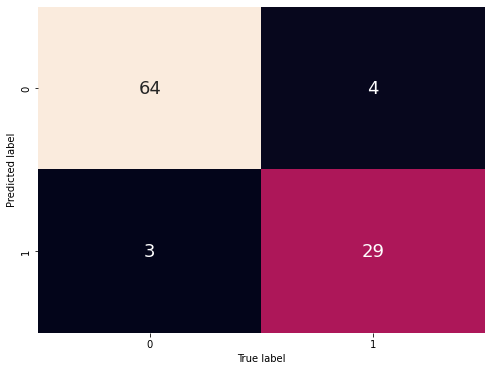

In [ ]:
plot_confusion_matrix(confuse_matrix)

when predict = 0 and actual = 0, we have 64 samples (correct sammples)

when predict = 1 and actual = 1, we have 29 samples (correct sammples)

false +ve --> when predict = 1 and actual = 0

false -ve --> when predict = 0 and actual = 1

## Classification Report

we need only accuracy, precision, and f1 score here

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.

## Applying k-Fold Cross Validation

k-Fold Cross Validation consists of creating a certain number of k-train test folds, e.g. k=10 --> 10 cross validations ets

we will train on each train fold, and at the same time test(evaluate) the model on the test fold. As a result, we will end up with 10 different accuracies from each test fold, finally we will get the mean accuracy

In [ ]:
from sklearn.model_selection import cross_val_score

k = 10 # optimal number
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = k)

# print using format() function, .2f - 2dp
print("Accuracy: {:.2f} %" .format(accuracies.mean() * 100)) 

# print standard deviation/variance between each accuracy 
print("Standard deviation: {:.2f} %" .format(accuracies.std() * 100))  

Accuracy: 90.33 %
Standard deviation: 6.57 %


The accuracy from here is the relevant accuracy (compared to the one above)

90.33 +- 6.57% --> high sd, therefore the range is:  83.5 - 96.5 (range is large enough for this problem dataset)

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


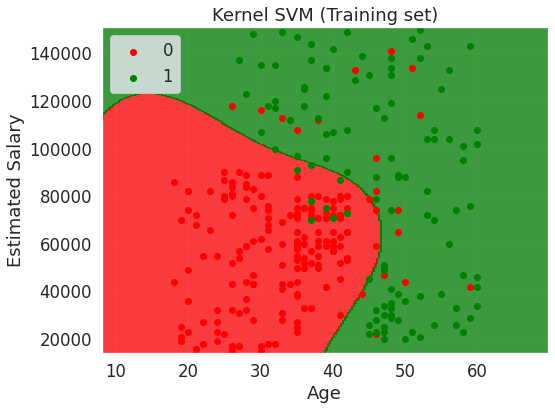

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,6))

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()

# There will be some incorrect predictions, and that's okay, since we do not want to overfit our model

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


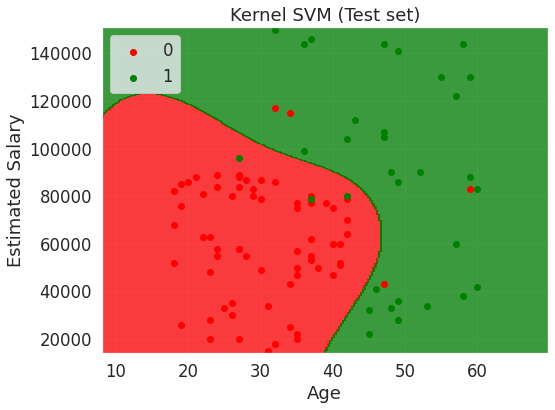

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,6))

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()
plt.show()